# Business Questions to ask:
### 1- Which Group has the Highest Suicide Rates (Based on Sex and Age Groups)?
### 2- Which was the worst year across the world for suicide rate?
### 3- Which countries have had the unhappiest male/females in the world?
### 4- Does HDI & GDP per Capita of a country has an impact on suicide rates there?

In [33]:
#Importing Essential Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [34]:
#Reading the data
df = pd.read_csv('master.csv')
df=df.set_index('country')

In [35]:
#Cleaning the Column name fit for use
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('$', '')

In [36]:
df.head()

,year,sex,age,suicides_no,population,suicides/100kpop,country-year,hdiforyear,gdp_for_year,gdp_per_capita,generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [37]:
df.shape

(27820, 11)

In [38]:
df.drop(['country-year'], axis=1, inplace=True)

In [39]:
#Evaluating the null values in each column, luckily we have just one column with missing values i.e. hdiforyear
df.isnull().sum()

year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100kpop        0
hdiforyear          19456
gdp_for_year            0
gdp_per_capita          0
generation              0
dtype: int64

#### NEW CHALLENGE: to find HDI values of Countries online and append them in original dataset

In [40]:
#therefore from http://hdr.undp.org/en/data# we extract a csv file of HDI and load is here
df_hdi = pd.read_csv('hdi.csv')
df_hdi.columns = df_hdi.columns.str.strip().str.lower().str.replace(' ', '')

In [41]:
df_hdi.head()

,hdirank(2018),country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [42]:
df_hdi.drop(['hdirank(2018)'], axis=1, inplace=True)

In [43]:
##Converting the imported HDI dataset into Long Format for easy concatenation
df_melt=pd.melt(df_hdi, id_vars=(df_hdi.columns[0]),value_vars=(df_hdi.columns[1:]), var_name='year', value_name='hdi')
df_melt=df_melt.sort_values(['country','year'])
df_melt['year']=df_melt['year'].astype('int32')
df_melt.head()

,country,year,hdi
0,Afghanistan,1990,0.298
212,Afghanistan,1991,0.304
424,Afghanistan,1992,0.312
636,Afghanistan,1993,0.308
848,Afghanistan,1994,0.303


In [44]:
##Converting hdi values to float
df_melt['hdi']=pd.to_numeric(df_melt['hdi'],errors='coerce')

In [45]:
df_melt.dtypes

country     object
year         int32
hdi        float64
dtype: object

In [46]:
#since the hdi data imported is available from 1990 to 2018, 
#and the original data is from 1987 to 2016, therefore analysing data from 1990 to 2016 only.
df=df[df['year']>1990]
df_melt=df_melt[df_melt['year']<2016]

In [47]:
df_final = pd.merge(df, df_melt[['country','year','hdi']], on=['country','year'])

In [48]:
df_final.drop_duplicates(inplace=True)
df_final.shape

(22548, 12)

In [49]:
df_final.head(50)

,country,year,sex,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation,hdi
0,Albania,1992,male,35-54 years,12,343800,3.49,NaN,"709,452,584",251,Boomers,0.608
1,Albania,1992,male,15-24 years,9,263700,3.41,NaN,"709,452,584",251,Generation X,0.608
2,Albania,1992,male,55-74 years,5,159500,3.13,NaN,"709,452,584",251,Silent,0.608
3,Albania,1992,male,25-34 years,7,245500,2.85,NaN,"709,452,584",251,Boomers,0.608
4,Albania,1992,female,15-24 years,7,292400,2.39,NaN,"709,452,584",251,Generation X,0.608
5,Albania,1992,female,25-34 years,4,267400,1.50,NaN,"709,452,584",251,Boomers,0.608
6,Albania,1992,female,35-54 years,2,323100,0.62,NaN,"709,452,584",251,Boomers,0.608
7,Albania,1992,female,55-74 years,1,164900,0.61,NaN,"709,452,584",251,Silent,0.608
8,Albania,1992,female,5-14 years,0,336700,0.00,NaN,"709,452,584",251,Millenials,0.608
9,Albania,1992,female,75+ years,0,38700,0.00,NaN,"709,452,584",251,G.I. Generation,0.608


In [50]:
df_final.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100kpop        0
hdiforyear          15408
gdp_for_year            0
gdp_per_capita          0
generation              0
hdi                  1308
dtype: int64

##### Now we have to append the hdi of new imported dataset into the original one

In [51]:
df_final['hdiforyear'].fillna(df_final['hdi'], inplace=True)

In [52]:
df_final.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation,hdi
0,Albania,1992,male,35-54 years,12,343800,3.49,0.608,"709,452,584",251,Boomers,0.608
1,Albania,1992,male,15-24 years,9,263700,3.41,0.608,"709,452,584",251,Generation X,0.608
2,Albania,1992,male,55-74 years,5,159500,3.13,0.608,"709,452,584",251,Silent,0.608
3,Albania,1992,male,25-34 years,7,245500,2.85,0.608,"709,452,584",251,Boomers,0.608
4,Albania,1992,female,15-24 years,7,292400,2.39,0.608,"709,452,584",251,Generation X,0.608


In [53]:
df_final.isnull().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicides/100kpop       0
hdiforyear          1308
gdp_for_year           0
gdp_per_capita         0
generation             0
hdi                 1308
dtype: int64

In [54]:
df_final.drop(['hdi'], axis=1, inplace=True)

In [55]:
df_final.shape

(22548, 11)

##### YAY! Succesfully Done the merging of online gathered data to main data set
#### Now filling the leftover 1308 Nan's using forward / backward fills by country

In [56]:
df_final['hdiforyear']=df_final.groupby('country')['hdiforyear'].fillna(method='ffill').fillna(method='bfill')

In [57]:
df_final.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1992,male,35-54 years,12,343800,3.49,0.608,"709,452,584",251,Boomers
1,Albania,1992,male,15-24 years,9,263700,3.41,0.608,"709,452,584",251,Generation X
2,Albania,1992,male,55-74 years,5,159500,3.13,0.608,"709,452,584",251,Silent
3,Albania,1992,male,25-34 years,7,245500,2.85,0.608,"709,452,584",251,Boomers
4,Albania,1992,female,15-24 years,7,292400,2.39,0.608,"709,452,584",251,Generation X


In [58]:
df_final.isnull().sum()

country             0
year                0
sex                 0
age                 0
suicides_no         0
population          0
suicides/100kpop    0
hdiforyear          0
gdp_for_year        0
gdp_per_capita      0
generation          0
dtype: int64

In [80]:
df_final.dtypes

country              object
year                  int64
sex                  object
age                  object
suicides_no           int64
population            int64
suicides/100kpop    float64
hdiforyear          float64
gdp_for_year         object
gdp_per_capita        int64
generation           object
dtype: object

### Finally we have a clean data frame, without any NaN values and perfect Data Types of Columns

In [60]:
df_final.head()

,country,year,sex,age,suicides_no,population,suicides/100kpop,hdiforyear,gdp_for_year,gdp_per_capita,generation
0,Albania,1992,male,35-54 years,12,343800,3.49,0.608,"709,452,584",251,Boomers
1,Albania,1992,male,15-24 years,9,263700,3.41,0.608,"709,452,584",251,Generation X
2,Albania,1992,male,55-74 years,5,159500,3.13,0.608,"709,452,584",251,Silent
3,Albania,1992,male,25-34 years,7,245500,2.85,0.608,"709,452,584",251,Boomers
4,Albania,1992,female,15-24 years,7,292400,2.39,0.608,"709,452,584",251,Generation X


In [99]:
#df_final['generation'].unique()
df_final['age'].unique()
#df_final['country'].unique()

array(['35-54 years', '15-24 years', '55-74 years', '25-34 years',
       '5-14 years', '75+ years'], dtype=object)

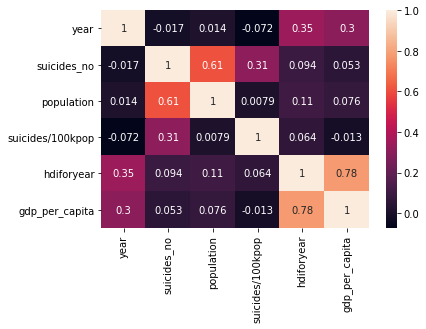

In [78]:
corrM=df_final.corr()
sns.heatmap(corrM, annot=True)
plt.show()

### The correlation Matrix Shows following realtion, but let's keep in mind that Correlation DOESNOT imply Causation
##### 1- population & suicides numbers are highly corelated
##### 2- so is suicides and suicides/100k population (Obvious)
##### 3- Suicides and Hdi for year are also positively corelated!!!
##### 4- Year & GDP per capita are also corelated

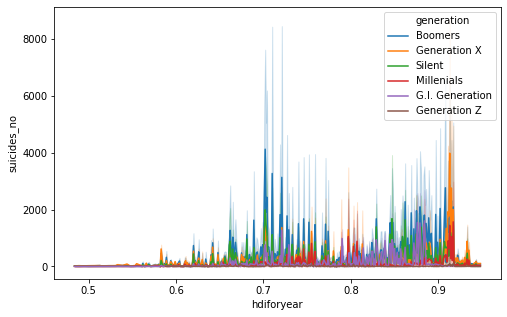

In [90]:
f, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x='hdiforyear', y='suicides_no',hue= 'generation', data=df_final, ax=ax)

### This doesn't imply much about the data
## Let's Try Multiplots

/Users/aadhar/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


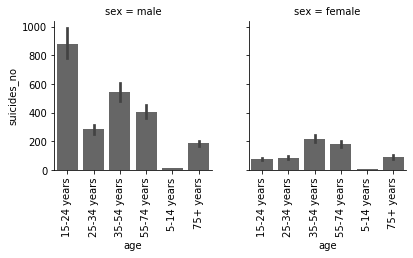

In [127]:
g = sns.FacetGrid(df_final, col='sex')
chart= g.map(sns.barplot, "age", "suicides_no", color=".4")
chart.set_xticklabels(rotation=90)
plt.show()

### There can be few observations made from this
#### 1- The Suicides Rate in Males are way too much higher comapred to females
#### 2- Males Between the age of 15-24 Years i.e. Generation X, has the highest Suicide Rate
#### 3- Overall the Age group of 5-14 Years of age has lesser suicide rate compared to other, which is obvious, since they don't have heavy mental pressure compared to others
#### 4- Females of 33-54 Years of age have Highest suicide rates amongst Females

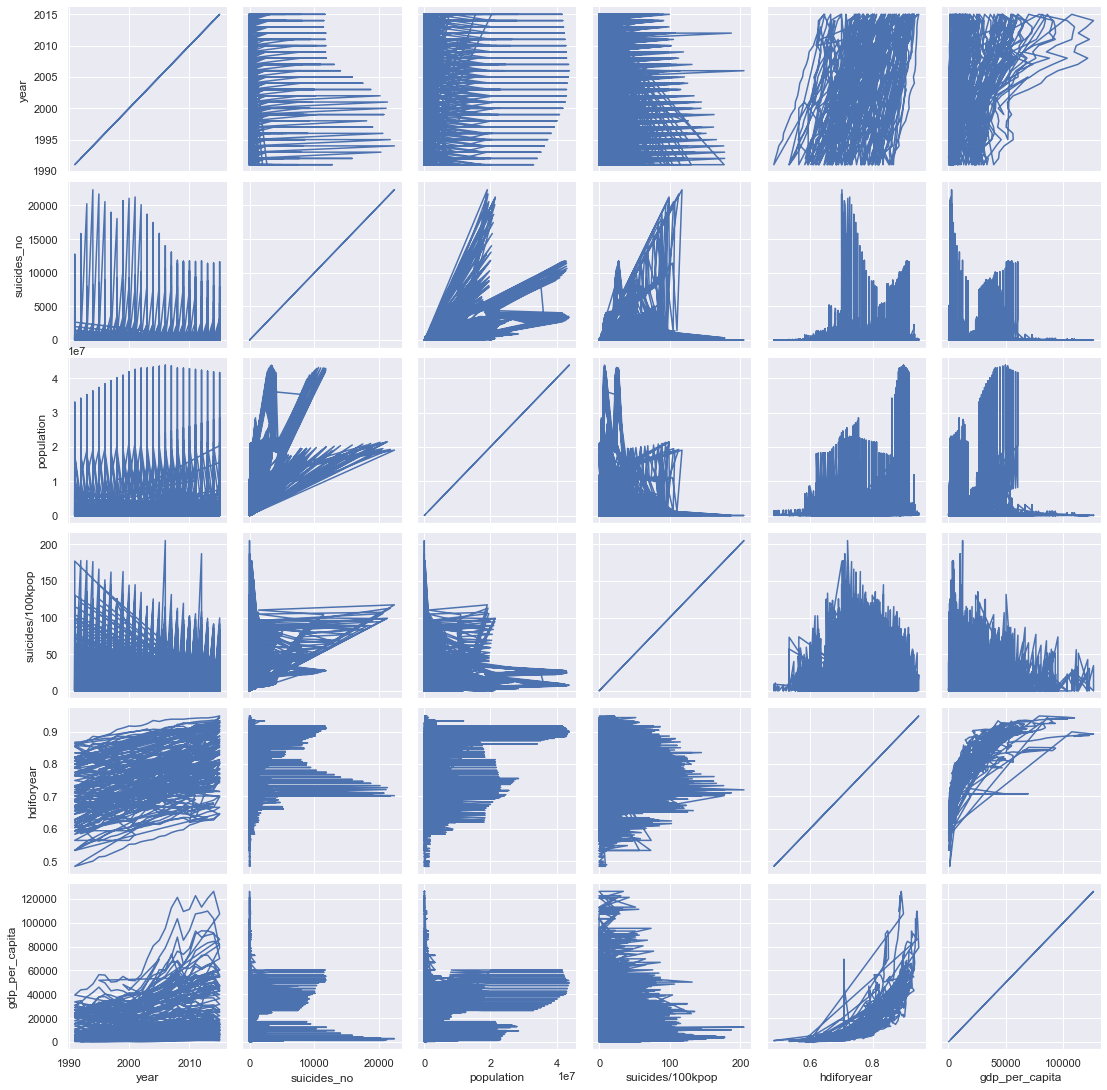

In [204]:
g = sns.PairGrid(df_final)
g.map(plt.plot)

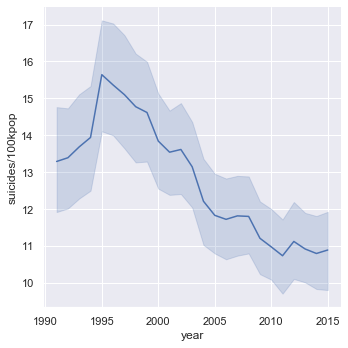

In [209]:
sns.relplot(x='year',y='suicides/100kpop',kind='line', data=df_final, ci=95)

### With Confidence Interval of 95%, the highest Suicides/100k Population across the world was in 1995

# Can't use suicides_no on Y axis since some countries have higher population compared to others so the metric will not justify the suicide rate, 

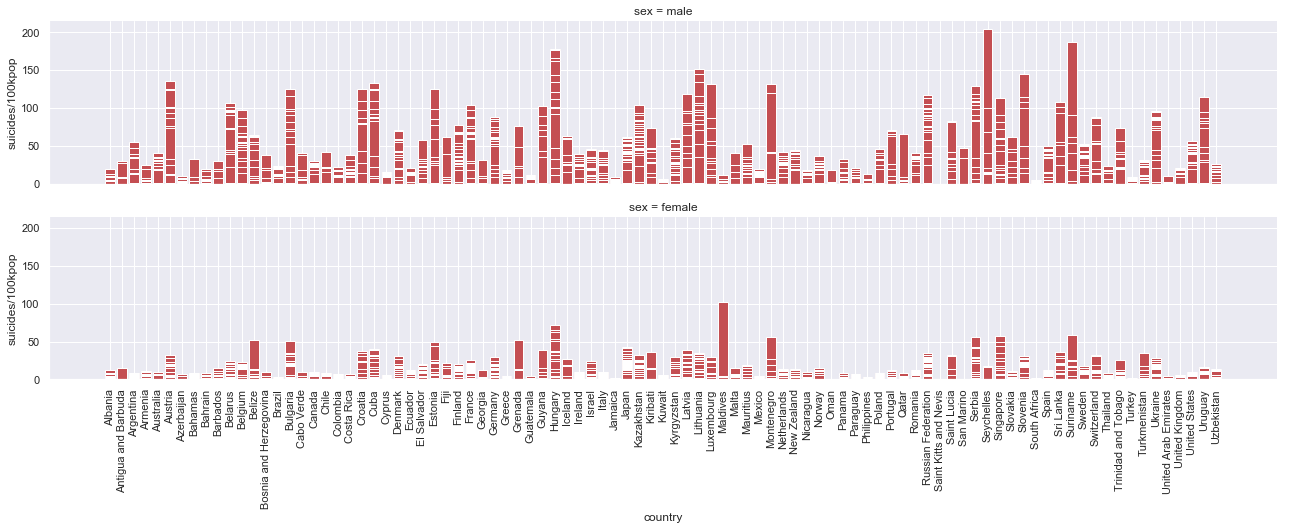

In [211]:
sns.set()
g = sns.FacetGrid(df_final, col='sex',col_wrap=1, aspect=6)
chart= g.map(plt.bar, "country", "suicides/100kpop", color="r")
chart.set_xticklabels(rotation=90)
g.add_legend();

## From the above graph, we come to know that most suicides/100k population 
## A- Men from Seychelles have been unhappiest in the world (highest suicide rates)
## B-Women from Maldives have been unhappiest in the world (highest suicide rates)

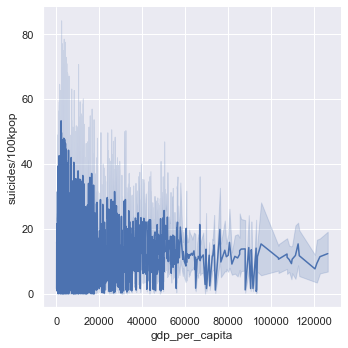

In [215]:
sns.relplot(x='gdp_per_capita',y='suicides/100kpop',kind='line', data=df_final, ci=95)

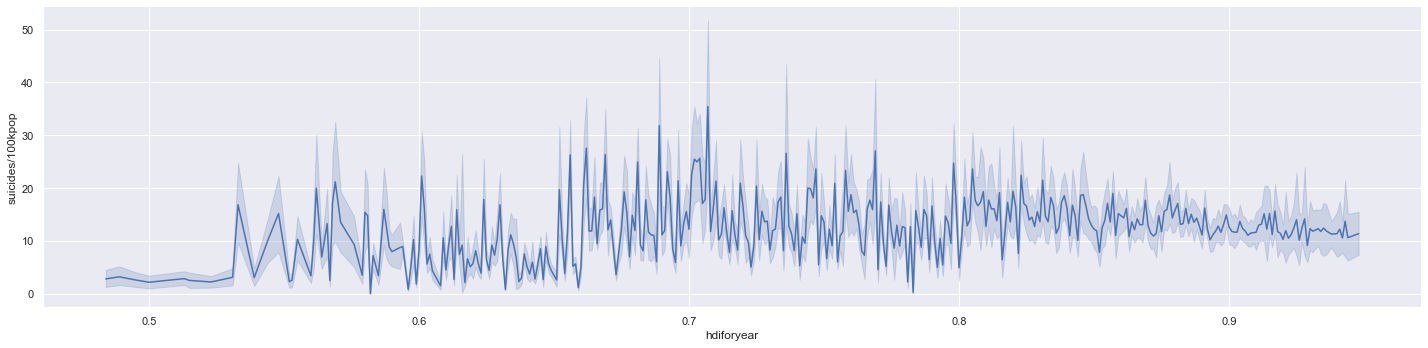

In [217]:
sns.relplot(x='hdiforyear',y='suicides/100kpop',kind='line', data=df_final, ci=95, aspect=4)

## Yes, as the GDP per Capita Increases the Suicide Rate per 100K population Decreases
## But, looks like the HDI for Year doesn't affect the Suicide Rate directly